In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
given = pd.read_csv("../data/raw/sg-primary-schools.csv")
print(given.shape)
given.head()

(191, 3)


,name,lat,lng
0,Admiralty Primary School,1.442941,103.800345
1,Ahmad Ibrahim Primary School,1.433849,103.832710
2,Ai Tong School,1.360713,103.833018
3,Alexandra Primary School,1.291284,103.824066
4,Anchor Green Primary School,1.390380,103.887354


In [148]:
# higher number of places taken up till phase 2B the better the school
rankings = pd.read_csv("../data/raw/sg-primary-school-ranking.csv")
print(rankings.shape)
rankings.head()

(190, 9)


,Name,Type,GenderMix,Area,Zone,PostalCode,Latitude,Longitude,PlacestakenuptillPhase2B
0,Admiralty Primary School,Government,Mixed,Woodlands,North,738907,1.4427,103.7995,130
1,Ahmad Ibrahim Primary School,Government,Mixed,Yishun,North,768643,1.4333,103.8321,51
2,Ai Tong School,"Government-aided, SAP",Mixed,Bishan,South,579646,1.3603,103.8321,302
3,Alexandra Primary School,Government,Mixed,Bukit Merah,South,159016,1.2913,103.8233,82
4,Anchor Green Primary School,Government,Mixed,Sengkang,North,544969,1.3913,103.8863,101


In [149]:
# find the difference of 1 record. What is that record? How to assign?
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff
# conclude only valor needs updating. 
# The rest can merge columns since the indexes are the same i.e. 20 and 20, 144 and 144.

20                Canossa Convent Primary School
144      Singapore Chinese Girls' Primary School
20      Canossa Catholic Primary School1.3263004
144    Singapore Chinese Girls’ School (Primary)
166                        Valour Primary School
dtype: object

In [150]:
rankings.loc[144, 'Name'] = given.loc[144, 'name']
rankings.loc[20, 'Name'] = given.loc[20, 'name']

In [151]:
# should only have valor as difference
# find the difference of 1 record. What is that record? How to assign?
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff

166    Valour Primary School
dtype: object

In [152]:
# find valor primary school's location. It is in Punggol.
punggol = rankings['Area'] == 'Punggol'
pg = rankings.loc[punggol]['PlacestakenuptillPhase2B'].mean()

new_row = {"Name": 'Valour Primary School', 
           "Type":'a',
           "GenderMix":'a',
           "Area":'a',
           "Zone": 'a',
           "PostalCode": 1,
           "Latitude": 1,
           "Longitude": 1,
           "PlacestakenuptillPhase2B": pg}

line = pd.DataFrame(new_row, index=[166])
rankings = pd.concat([rankings.iloc[:166], line, rankings.iloc[166:]]).reset_index(drop=True)
rankings.shape



(191, 9)

In [153]:
# should not have any differences
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff

Series([], dtype: object)

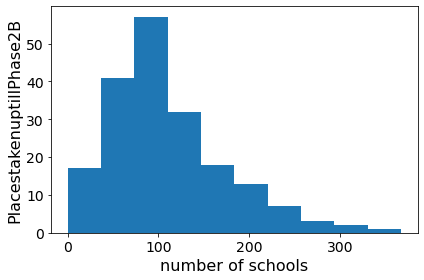

In [154]:
# find distribution of places
plt.figure()
plt.tick_params(labelsize=14)
plt.hist(rankings['PlacestakenuptillPhase2B'].to_numpy(), bins=10)
plt.xlabel('number of schools', fontsize=16)
plt.ylabel('PlacestakenuptillPhase2B', fontsize=16)
plt.tight_layout()
plt.show()

In [155]:
combined = pd.concat([given, rankings["PlacestakenuptillPhase2B"]], axis=1)
combined

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,130.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,51.0
2,Ai Tong School,1.360713,103.833018,302.0
3,Alexandra Primary School,1.291284,103.824066,82.0
4,Anchor Green Primary School,1.390380,103.887354,101.0
...,...,...,...,...
186,Yuhua Primary School,1.342891,103.740960,62.0
187,Yumin Primary School,1.351264,103.950874,77.0
188,Zhangde Primary School,1.284250,103.826082,112.0
189,Zhenghua Primary School,1.379424,103.769676,99.0


In [156]:
# now it's time to rank the places
combined["PlacestakenuptillPhase2B"] = combined["PlacestakenuptillPhase2B"] ** 2
combined

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,16900.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,2601.0
2,Ai Tong School,1.360713,103.833018,91204.0
3,Alexandra Primary School,1.291284,103.824066,6724.0
4,Anchor Green Primary School,1.390380,103.887354,10201.0
...,...,...,...,...
186,Yuhua Primary School,1.342891,103.740960,3844.0
187,Yumin Primary School,1.351264,103.950874,5929.0
188,Zhangde Primary School,1.284250,103.826082,12544.0
189,Zhenghua Primary School,1.379424,103.769676,9801.0


In [157]:
combined.to_csv("../data/processed/psch-ranked.csv",index=False)

In [158]:
d = pd.read_csv("../data/processed/psch-ranked.csv")
d.head()

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,16900.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,2601.0
2,Ai Tong School,1.360713,103.833018,91204.0
3,Alexandra Primary School,1.291284,103.824066,6724.0
4,Anchor Green Primary School,1.390380,103.887354,10201.0
